<a target="_blank" href="https://colab.research.google.com/drive/1mXegw-l65L9Z-JbxVOIW5Pz_gqfU4QNs?usp=sharing">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
%%capture
! pip install pip==21.3.1
! pip install ultralytics==8.0.53
! pip install clearml==1.9.3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from glob import glob
import numpy as np
import torch
import ultralytics
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import clearml
from clearml import Task

In [ ]:
class cnf:
    PROJECT_NAME = "Pedestrian-Detection-YOLOv8"
    TASK_NAME = "yolov8n_imgsz1024_epochs50"
    CKPT = "yolov8n.pt"
    IMGSZ = 1024
    EPOCHS = 50

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 25.5/166.8 GB disk)


In [ ]:
clearml.browser_login()

<IPython.core.display.Javascript object>


🤖 ClearML connected successfully - let's build something! 🚀


In [ ]:
%%shell
cp /content/drive/MyDrive/Reza/Projects/Pedestrian-Detection/data/citypersons.zip .
unzip -q citypersons.zip

In [ ]:
# create ClearML experiment and task
task = Task.init(project_name=cnf.PROJECT_NAME, task_name=cnf.TASK_NAME)

ClearML Task: created new task id=7cca22b17f7149d4a27135342b1aa0b4
ClearML results page: https://app.clear.ml/projects/c44ac5edda124f9fa0400f27bf7659c4/experiments/7cca22b17f7149d4a27135342b1aa0b4/output/log


In [ ]:
# load a pretrained model
model = YOLO(cnf.CKPT)

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

2023-03-17 10:02:29,886 - clearml.model - INFO - Selected model id: 96920760883b420098dc25cc39edaf86


In [ ]:
%%time
# train the model
model.train(data='/content/citypersons/dataset.yaml', 
            imgsz=cnf.IMGSZ, 
            epochs=cnf.EPOCHS)

New https://pypi.org/project/ultralytics/8.0.54 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/citypersons/dataset.yaml, epochs=50, patience=50, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

2023-03-17 10:04:25,454 - clearml.frameworks - INFO - Found existing registered model id=3f6fb710d3634d36ad6e029b3808e613 [/content/runs/detect/train/weights/last.pt] reusing it.
2023-03-17 10:04:36,258 - clearml.frameworks - INFO - Found existing registered model id=e962754b91194f3c8c9a912133edcac3 [/content/runs/detect/train/weights/best.pt] reusing it.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/50      9.36G      1.546      1.446      1.082         99       1024: 100%|██████████| 160/160 [00:48<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.87it/s]
                   all        451       4164      0.586      0.386      0.429      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       3/50      9.36G      1.571      1.429      1.088         91       1024: 100%|██████████| 160/160 [00:48<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.92it/s]
                   all        451       4164      0.714      0.378       0.44      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       4/50      9.36G       1.53      1.387      1

2023-03-17 10:58:53,247 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/Pedestrian-Detection-YOLOv8/yolov8n_imgsz1024_epochs50.7cca22b17f7149d4a27135342b1aa0b4/models/best.pt
CPU times: user 27min 22s, sys: 4min 55s, total: 32min 17s
Wall time: 56min 4s


In [ ]:
# close clearml task
task.close()

In [ ]:
# helper functions for ploting predictions
def box_label(image, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
  lw = max(round(sum(image.shape) / 2 * 0.003), 2)
  p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
  cv2.rectangle(image, p1, p2, color, thickness=lw, lineType=cv2.LINE_AA)
  if label:
    tf = max(lw - 1, 1)  # font thickness
    w, h = cv2.getTextSize(label, 0, fontScale=lw / 3, thickness=tf)[0]  # text width, height
    outside = p1[1] - h >= 3
    p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
    cv2.rectangle(image, p1, p2, color, -1, cv2.LINE_AA)  # filled
    cv2.putText(image,
                label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                0,
                lw / 3,
                txt_color,
                thickness=tf,
                lineType=cv2.LINE_AA)
    
def plot_bboxes(image, boxes, labels=[], colors=[], score=True, conf=None):
  # Define Labels
  if labels == []:
    labels = {0: u'__background__', 1: u'rider', 2: u'pedestrian'}
  # Define colors
  if colors == []:
    
    colors = [(89, 161, 197), (190, 76, 98), (130, 172, 179), 
              (67, 161, 255),(19, 222, 24),(186, 55, 2),
              (167, 146, 11),(130, 172, 179),(115, 209, 128),
              (204, 79, 135),(136, 126, 185),(209, 213, 45),]              
  
  #plot each boxes
  for box in boxes:
    #add score in label if score=True
    if score :
      label = labels[int(box[-1])+1] + " " + str(round(100 * float(box[-2]),1)) + "%"
    else :
      label = labels[int(box[-1])+1]
    #filter every box under conf threshold if conf threshold setted
    if conf :
      if box[-2] > conf:
        color = colors[int(box[-1])]
        box_label(image, box, label, color)
    else:
      color = colors[int(box[-1])]
      box_label(image, box, label, color)

  #show image
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  try:
    import google.colab
    IN_COLAB = True
  except:
    IN_COLAB = False

  if IN_COLAB:
    cv2_imshow(image) #if used in Colab
  else :
    cv2.imshow(image) #if used in Python


image 1/1 /content/citypersons/valid/images/munster_000023_000019_leftImg8bit.png: 512x1024 1 rider, 1 pedestrian, 20.9ms
Speed: 0.7ms preprocess, 20.9ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


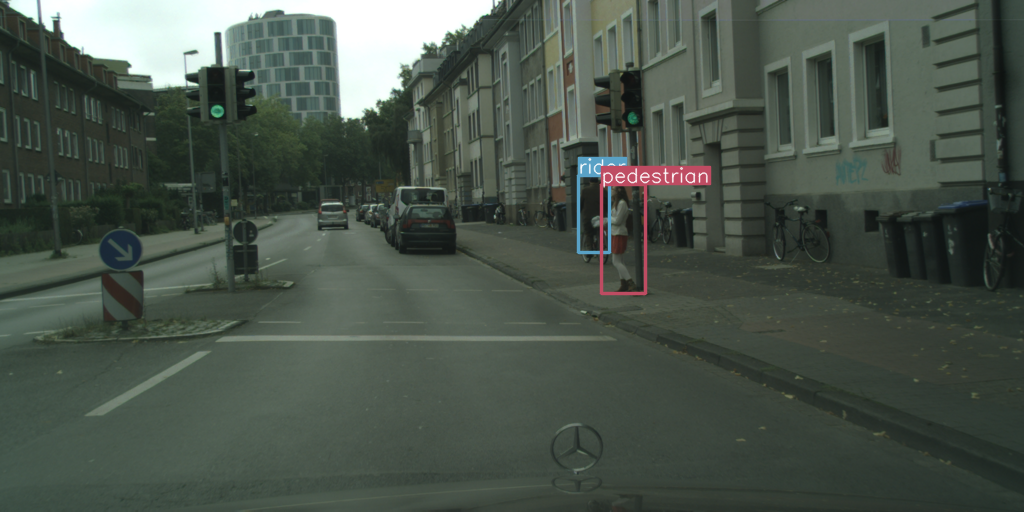


image 1/1 /content/citypersons/valid/images/frankfurt_000001_028232_leftImg8bit.png: 512x1024 1 pedestrian, 17.6ms
Speed: 0.7ms preprocess, 17.6ms inference, 1.9ms postprocess per image at shape (1, 3, 1024, 1024)


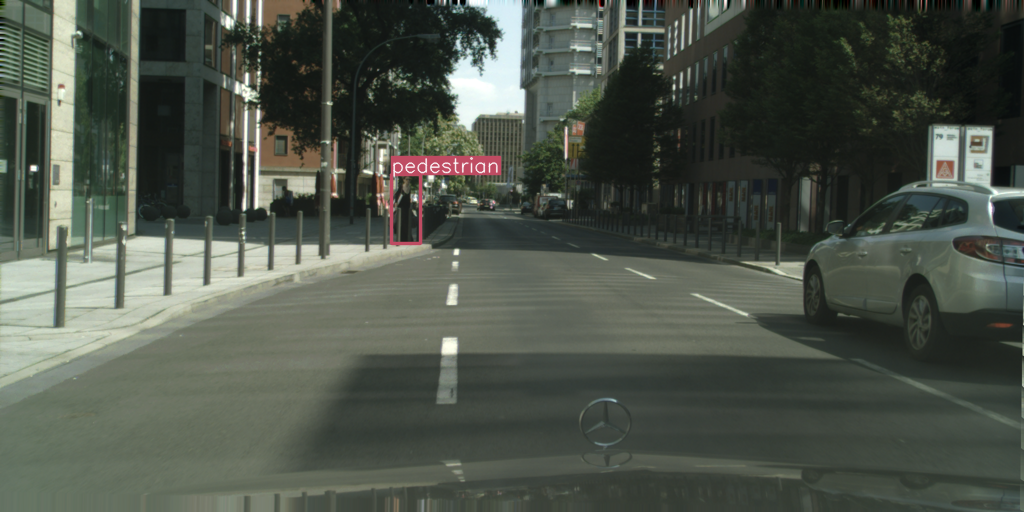

In [ ]:
# make prediction on a few validation images and plot the results
valid_images = [fp for fp in glob("/content/citypersons/valid/images/*.png")]

for fp_img in np.random.choice(valid_images, 2):
    preds = model.predict(fp_img);
    image = Image.open(fp_img)
    image = np.asarray(image)
    plot_bboxes(image, preds[0].boxes.boxes, score=False)